# Очистка данных. Практическая работа

## Цель практической работы

- Научиться выполнять очистку и подготовку данных для их дальнейшего использования в задаче машинного обучения.

## Что нужно сделать

- Загрузить данные в ноутбук.
- Провести разведочный анализ данных.
- Разделить данные на обучающую и тестовую выборки.
- Выполнить очистку и подготовку данных.

## Что оценивается 

1. Выполнены все этапы задания.
1. Не допущены утечки данных.

## Формат сдачи

Выполните предложенные задания: впишите свой код в ячейки после комментария `### YOUR CODE HERE ###` и сохраните изменения, используя опцию *Save and Checkpoint* из вкладки меню *File* или кнопку *Save and Checkpoint* на панели инструментов. Итоговый файл в формате `.ipynb` (файл Jupyter Notebook) загрузите в личный кабинет и отправьте на проверку.

## Задача
Имеется набор данных покупателей супермаркета. Проведите анализ и очистку этих данных.

### Описание данных

Дан файл Mall_Customers.csv, содержащий следующие данные по покупателям сети супермаркетов:
- CustomerID — идентификатор покупателя.
- Genre – пол покупателя.
- Age – возраст покупателя.
- Annual Income (k\$) – годовой доход покупателя, тысяч $.
- Spending Score (1–100) – рейтинг покупателя, целевая переменная.

### Задание 1

Загрузите данные из файла `Mall_Customers.csv` в ноутбук и выведите первые пять строк на экран.

In [1]:
### YOUR CODE HERE ###

import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv('Mall_Customers.csv')
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,39
1,2,Male,NaN,NaN,81
2,3,Female,NaN,16.0,6
3,4,Female,23.0,16.0,77
4,5,Female,31.0,17.0,40


### Задание 2

Проведите разведочный анализ загруженных данных. Обязательные атрибуты для анализа:
- количество пропусков в каждом признаке;
- распределения признаков;
- возможные выбросы или аномалии.

Анализ дополнительных атрибутов и свойств данных приветствуется. Используйте средства визуализации там, где это необходимо.

По результатам анализа сделайте выводы о свойствах отдельных признаков и качестве данных в целом.

In [2]:
### YOUR CODE HERE ###

# Посмотрим на сумму пропусков
df.isna().sum()

# по 10% пропусков на трех колонках

CustomerID                 0
Genre                     19
Age                       20
Annual Income (k$)        20
Spending Score (1-100)     0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Genre                   181 non-null    object 
 2   Age                     180 non-null    float64
 3   Annual Income (k$)      180 non-null    float64
 4   Spending Score (1-100)  200 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 7.9+ KB


In [4]:
# Проверим нет ли строк с пропусками во всех колонках

df[pd.isna(df).all(axis=1)]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,180.000000,180.000000,200.000000
mean,100.500000,39.894444,5615.433333,50.200000
std,57.879185,16.842848,74531.115872,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,29.000000,42.000000,34.750000
50%,100.500000,36.000000,61.000000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,135.000000,1000000.000000,99.000000


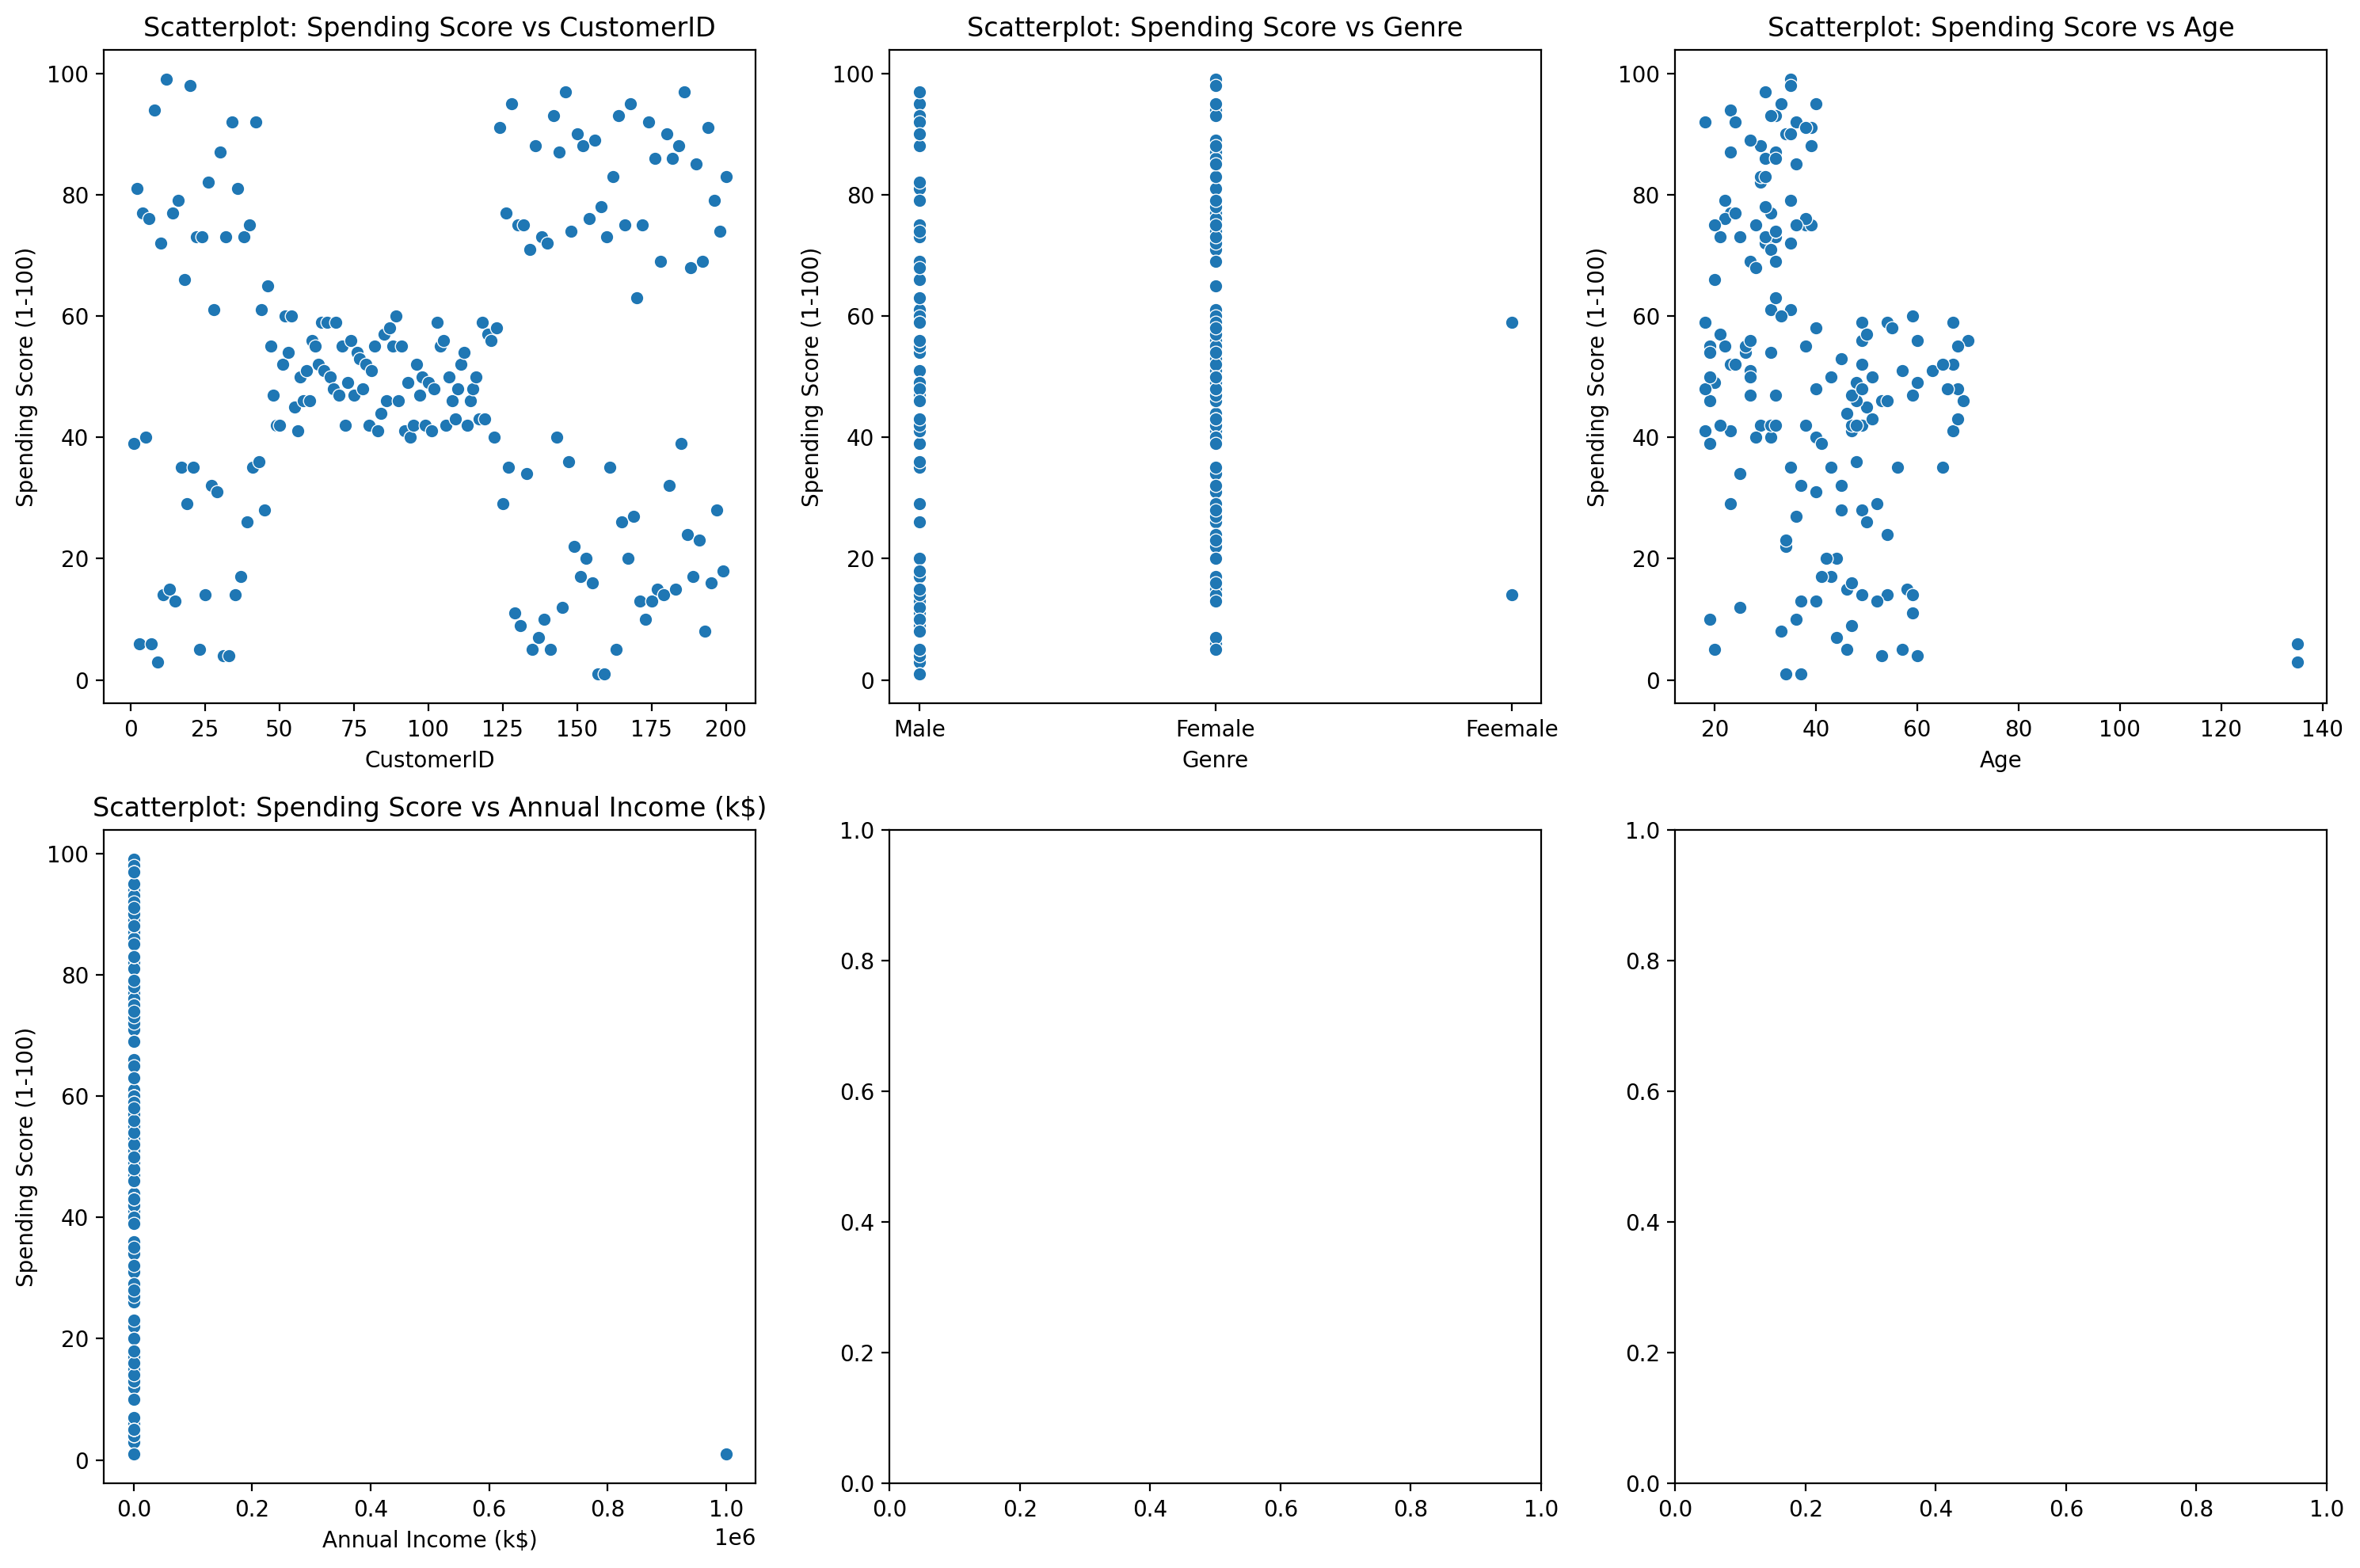

In [6]:
# Посмотрим на распределение значении по целевой переменной.

import matplotlib.pyplot as plt
import seaborn as sns

# Удаляем столбец с целевой переменной "Spending Score (1-100)" для получения списка переменных
variables = df.drop('Spending Score (1-100)', axis=1).columns

# Определяем количества строк и столбцов в сетке графиков
num_rows = len(variables) // 3 + (len(variables) % 3 > 0)
num_cols = min(3, len(variables))

# Создаем сетку графиков
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows), dpi=200)

# Проходим по переменным и строим скаттерплоты
for i, variable in enumerate(variables):
    row = i // num_cols
    col = i % num_cols
    sns.scatterplot(x=variable, y='Spending Score (1-100)', data=df, ax=axes[row, col])
    axes[row, col].set_title(f'Scatterplot: Spending Score vs {variable}')

# Размещаем графики
plt.tight_layout()
plt.show()

Айди нужно будет удалить. В гендерах видим ошибку в виде Feemale, сделаем из него Female. В возрасте видим или выбросы или долгожителей, но их нужно будет тоже заменить. Тоже самое с годовым заработком. Или удалим или заменим на среднюю

### Задание 3

Разделите данные на обучающую и тестовую выборки в пропорции 80:20. Здесь и далее используйте random_state = 1.

In [7]:
### YOUR CODE HERE ###

from sklearn.model_selection import train_test_split

X = df.drop(['Spending Score (1-100)', 'CustomerID'], axis=1)
y = df['Spending Score (1-100)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Задание 4

Заполните пропуски в признаках в обучающей выборке с использованием инструментов sklearn. Для каждого признака выберите и аргументируйте стратегию заполнения пропусков.

In [8]:
### YOUR CODE HERE ###

from sklearn.impute import SimpleImputer

# Создание объекта SimpleImputer для заполнения пропусков в числовых признаках средним значением
numeric_imputer = SimpleImputer(strategy='mean')

# Список числовых признаков
numeric_features = ['Age', 'Annual Income (k$)']

# Заполнение пропусков в числовых признаках
X_train[numeric_features] = numeric_imputer.fit_transform(X_train[numeric_features])

In [9]:
# Создание объекта SimpleImputer для заполнения пропусков в категориальных признаках самым часто встречающимся значением
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Заполнение пропусков в категориальных признаках
X_train[['Genre']] = categorical_imputer.fit_transform(X_train[['Genre']])

In [10]:
X_train.isna().sum()

Genre                 0
Age                   0
Annual Income (k$)    0
dtype: int64

Мы заполнили все пропуски (средним значением для числовых, и модой для категориальных признаков) таким способом, потому что у нас слишком мало данных для того что бы понимать закономерности и в данных и присваивать осознанные значения для разных групп пользователей.

### Задание 5

Найдите выбросы в признаках обучающей выборки. Замените выбросы, если таковые имеются, и аргументируйте выбор метода поиска выбросов.


In [11]:
### YOUR CODE HERE ###

# Посмотрим на гендеры
X_train['Genre'].value_counts()

Genre
Female     92
Male       67
Feemale     1
Name: count, dtype: int64

In [12]:
# Заменим Feemale на Female
X_train['Genre'] = X_train['Genre'].replace('Feemale', 'Female')
X_train['Genre'].value_counts()

Genre
Female    93
Male      67
Name: count, dtype: int64

In [13]:
# Займемся числовыми признаками
X_train.sort_values(by='Age', ascending=False).head(10)

,Genre,Age,Annual Income (k$)
8,Male,135.0,19.0
6,Female,135.0,18.0
60,Male,70.0,46.0
57,Female,69.0,44.0
108,Male,68.0,63.0
67,Female,68.0,48.0
90,Female,68.0,59.0
62,Female,67.0,47.0
82,Male,67.0,54.0
109,Male,66.0,63.0


In [14]:
# Омолодим бабушку с дедушкой. Посмотрим средний возраст всех пользователей из выборки

X_train.Age[X_train['Age'] < 135].mean()

38.62287210824967

In [15]:
# Заменим 135 на 38

X_train['Age'] = X_train['Age'].replace(135.0, 38.0)
X_train['Age'].describe()

count    160.000000
mean      38.615086
std       12.961619
min       18.000000
25%       30.000000
50%       38.000000
75%       47.000000
max       70.000000
Name: Age, dtype: float64

In [16]:
# Очередь для дохода в год

X_train.sort_values(by='Annual Income (k$)', ascending=False).head(10)

# Считаю что миллиард в год в 37 это или выброс или какие то темные делишки. Уменьшаем его доход до самого большого не считая его

,Genre,Age,Annual Income (k$)
156,Male,37.000000,1000000.000000
182,Male,46.000000,7101.739437
54,Female,50.000000,7101.739437
164,Male,50.000000,7101.739437
75,Male,26.000000,7101.739437
187,Male,28.000000,7101.739437
1,Male,39.827586,7101.739437
128,Male,59.000000,7101.739437
138,Male,19.000000,7101.739437
104,Male,49.000000,7101.739437


In [17]:
X_train['Annual Income (k$)'] = X_train['Annual Income (k$)'].replace(1000000.000000, 7101.739437)
X_train['Annual Income (k$)'].describe()

count     160.000000
mean      896.125308
std      2285.266619
min        15.000000
25%        46.750000
50%        64.000000
75%        79.500000
max      7101.739437
Name: Annual Income (k$), dtype: float64

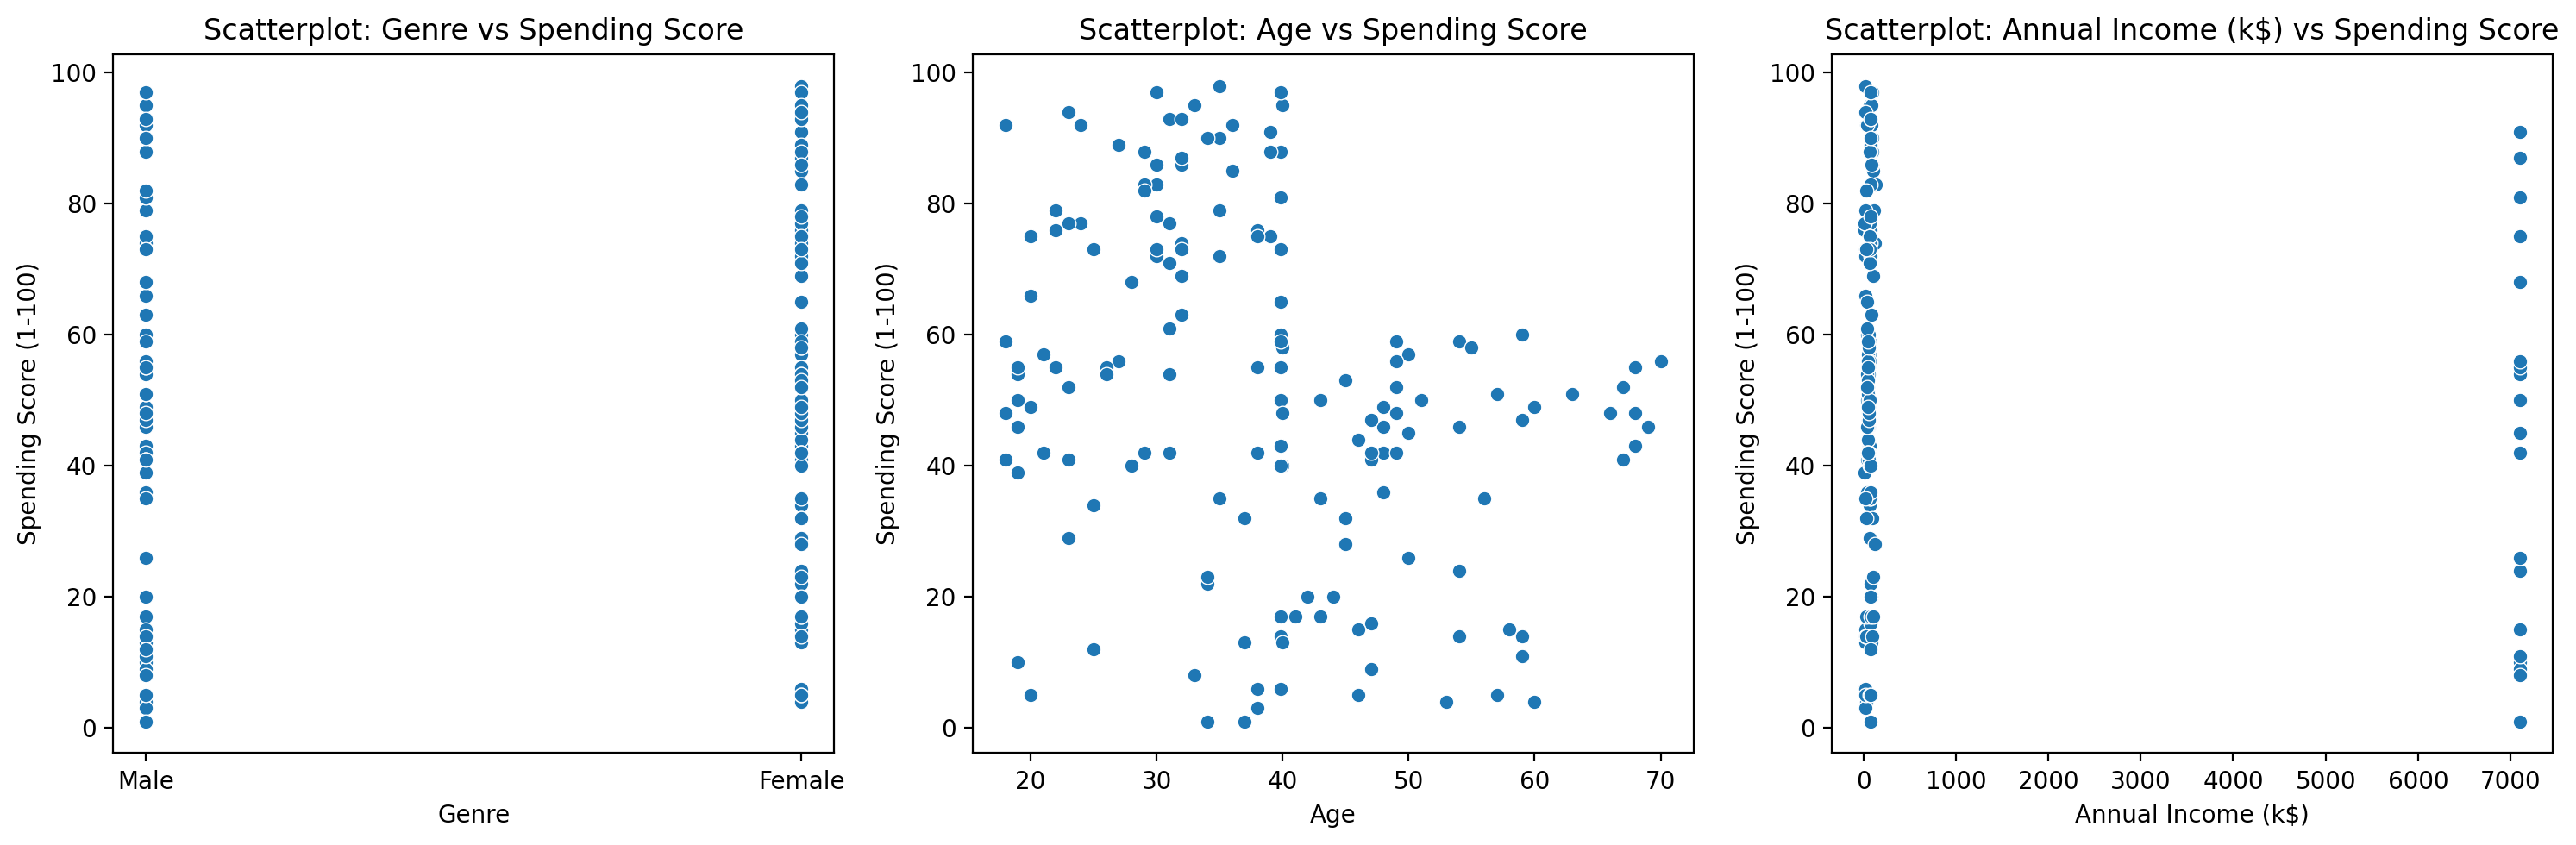

In [18]:
# Посмотрим на распределение значении по целевой переменной после обработки данных.

# Определяем количество строк и столбцов в сетке графиков
num_rows = 1
num_cols = len(X_train.columns)

# Создаем сетку графиков
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows), dpi=200)

# Проходим по признакам и строим скаттерплоты
for i, variable in enumerate(X_train.columns):
    sns.scatterplot(x=X_train[variable], y=y_train, ax=axes[i])
    axes[i].set_title(f'Scatterplot: {variable} vs Spending Score')

# Размещаем графики
plt.tight_layout()
plt.show()

Видим что миллионеры это анамалии. Их нужно бы исправить так как они сами по сете равномерно распределени по целевой переменной и как видим не влияет прямо на рейтинг

In [19]:
# Создаем словарь для замены значений
replacement_dict = {}

# Заполняем словарь значениями из цикла
for target, replacement in zip(y_train, X_train['Annual Income (k$)']):
    replacement_dict[replacement] = target

# Заменяем значения в колонке 'Annual Income (k$)' согласно словарю
X_train['Annual Income (k$)'] = X_train['Annual Income (k$)'].map(replacement_dict)

In [20]:
X_train['Annual Income (k$)'].describe()

count    160.000000
mean      47.675000
std       27.134779
min        1.000000
25%       28.000000
50%       48.000000
75%       73.000000
max       98.000000
Name: Annual Income (k$), dtype: float64

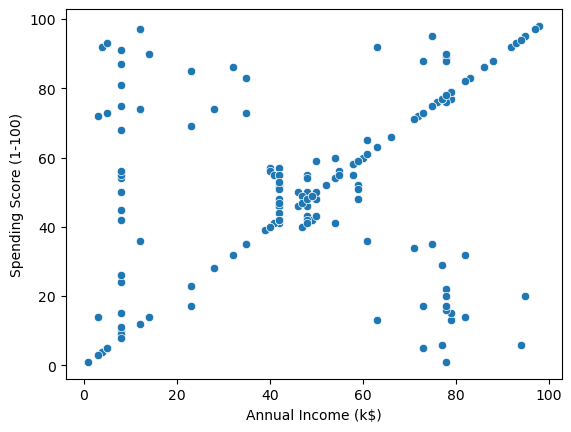

In [21]:
sns.scatterplot(x=X_train['Annual Income (k$)'], y=y_train);

Картинка уже по лучше, и даже какая никакая линейная зависимость возникает, но выбросы все еще есть

### Задание 6

Нормализуйте численные признаки. Аргументируйте выбор стратегии нормализации для каждого признака.


In [22]:
### YOUR CODE HERE ###

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols = ['Age', 'Annual Income (k$)']

# Заполнение пропусков в числовых признаках
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

Я выбрал StandardScaler потому что это простой и надежный метод стандартизации и нормализации данных, данные приводятся к нормальному распределению со средним значением 0 и стандартным отклонением 1

### Задание 7

Закодируйте категориальные признаки в обучающей выборке. Аргументируйте выбор способа кодирования.

In [23]:
### YOUR CODE HERE ###

X_train = pd.get_dummies(X_train, drop_first=True, dtype=np.int64)
X_train.head()

,Age,Annual Income (k$),Genre_Male
108,2.274189,0.012015,1
107,1.190686,0.012015,1
189,-0.202390,-0.912205,0
14,-0.124997,1.158047,1
56,0.958507,-0.061923,0


### Задание 8
Проведите очистку и подготовку тестовых данных. Используйте препроцессоры и другие инструменты, которые вы уже использовали при подготовке обучающей выборки, без их дополнительной настройки.

In [25]:
### YOUR CODE HERE ###

# Заполнение пропусков в числовых признаках в X_test
X_test[numeric_features] = numeric_imputer.transform(X_test[numeric_features])

# Заполнение пропусков в категориальных признаках в X_test
X_test[['Genre']] = categorical_imputer.transform(X_test[['Genre']])

In [26]:
X_test.isna().sum()

Genre                 0
Age                   0
Annual Income (k$)    0
dtype: int64

In [27]:
X_test['Genre'].value_counts()

Genre
Female     29
Male       10
Feemale     1
Name: count, dtype: int64

In [29]:
X_test['Genre'] = X_test['Genre'].replace('Feemale', 'Female')
X_test['Genre'].value_counts()

Genre
Female    30
Male      10
Name: count, dtype: int64

In [30]:
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test = pd.get_dummies(X_test, drop_first=True, dtype=np.int64)

In [33]:
X_test.head()

,Age,Annual Income (k$),Genre_Male
58,-0.898927,-0.061923,0
40,2.042010,-0.357673,0
34,0.803721,-0.542517,0
102,2.196796,0.529578,1
184,0.184576,1.897423,0
